Sólo figuras aquí, todos los cálculos serios en el otro notebook please.

In [4]:
using Statistics
using PyPlot
using JLD
using Interpolations
push!(LOAD_PATH,"../CenterOfMass/")
using TrayectoriasAux
#acuerdate: no quieres svg interpolados
matplotlib.rcParams[:"svg.image_noscale"]=false
salvadir="/home/karel/Dropbox/ArticulosNeurociencias/misfiguras/"

ErrorException: importing TrayectoriasAux into Main conflicts with an existing identifier

In [1]:
function ListaPixelesdeLinea(x::Array, y::Array)
    #obtener una lista de pixeles/electrodos a lo largo de una linea con dos endpoints enteros.
    #Se ponen las dos coordenadas x en un arreglo y las dos y en otro-
    xuno, xdos=x[1], x[2]
    yuno, ydos=y[1],y[2]
    if abs(xuno-xdos)>= abs(yuno-ydos)

        longitud=abs(xuno-xdos)
        m=(ydos-yuno)/(xdos-xuno)
        xresult=collect(xuno:xdos) #asumimos que el xdos es el grande!
        yresult=zeros(Int, longitud+1)
        for j in 1:longitud+1
            yresult[j]=round(Int,yuno+(j-1)*m)
        end
    else
        
        longitud=abs(yuno-ydos)
        m=(xdos-xuno)/(ydos-yuno)
        yresult=collect(yuno:ydos) #asumimos que el ydos es el grande!
        xresult=zeros(Int, longitud+1)
    for j in 1:longitud+1
        xresult[j]=round(Int,xuno+(j-1)*m)
    end
   
    end
        
    return (xresult,yresult)
end

ListaPixelesdeLinea (generic function with 1 method)

vamos a usar 3R7 (Evocado) para las gráficas evocadas.

In [3]:
arxlfp="../JLDFiles/Evocada/LFPDesaturado_3R7.jld"

LFPSaturado=load(arxlfp, "LFPSaturados")
LFPPlanchado=load(arxlfp, "LFPDenoized")

Dict{AbstractString,Array} with 3 entries:
  "Trancazo_2" => [23.0 22.1558 … 28.1982 32.2266; -10.0708 -56.3965 … -20.1416…
  "Trancazo_1" => [-25.0 -18.1274 … -16.1133 -18.1274; -6.04248 -70.4956 … -2.0…
  "Trancazo_3" => [-12.0 -14.0991 … -46.3257 6.04248; 0.0 -10.0708 … -28.1982 1…

In [4]:
nmax=248 #la actividad respuesta se muere poco antes de este cuadro.
(alto, ancho, nn)=size(LFPPlanchado["Trancazo_3"])

(64, 64, 457)

In [5]:
LFPProm=LFPPlanchado["Trancazo_1"]+LFPPlanchado["Trancazo_2"]+LFPPlanchado["Trancazo_3"]
LFPProm/=3;

Dice Rafael que el F siempre no, que no lo pongamos

In [6]:
puntox=[36,36,36,36,36,36]
puntoy=[6,9,12,15,18,21]
puntol=["f","e", "d", "c", "b","a"];
#=
puntoy=puntoy+3

primax=[32, 32, 32, 32, 32, 32]
primay=[43,47,51,55,59,63]
primal=["F'","E'", "D'", "C'", "B'","A'"];
dobleprimax=[44,48,52,54,58,62]
dobleprimay=[38,36,34,32,30,28]
dobleprimal=["F''","E''", "D''", "C''", "B''","A''"];
=#
(muchasx,muchasy)=ListaPixelesdeLinea([puntox[2],puntox[end]],[puntoy[2],puntoy[end]])
length(muchasx)

13

In [7]:
xizq=24
xder=48
ybajo=6
yalto=30
tiemposinteresantes=(28,63,70,77,84,91,95,98,105)
retraso=35
freq=7.022 # kHz (por alguna razon no en los archivos!!!)

7.022

In [8]:
GDpunts=[[42 36];  [50 40];  [63.5 38];  [62.5 29]; [61 22];  [55 15]]

CApunts=[[45 25]; [40 18]; [30  15]; [20 18]; [15 25]; [22 37]; [45 56]]

7×2 Array{Int64,2}:
 45  25
 40  18
 30  15
 20  18
 15  25
 22  37
 45  56

In [9]:
gdxin = interpolate( vec( GDpunts[ :,1 ] ), 
    BSpline( Cubic( Flat( OnCell( )
                )
            )
        )
    );
gdyin=interpolate(vec(GDpunts[:,2]), BSpline(Cubic(Flat(OnCell()))))
gdx=gdxin(range(1,6, step=0.25))
gdy=gdyin(range(1,6, step=0.25))

caxin=interpolate(vec(CApunts[:,1]), BSpline(Cubic(Flat(OnCell()))))
cayin=interpolate(vec(CApunts[:,2]), BSpline(Cubic(Flat(OnCell()))))
cax=caxin(range(1,7, step=0.25))
cay=cayin(range(1,7, step=0.25));


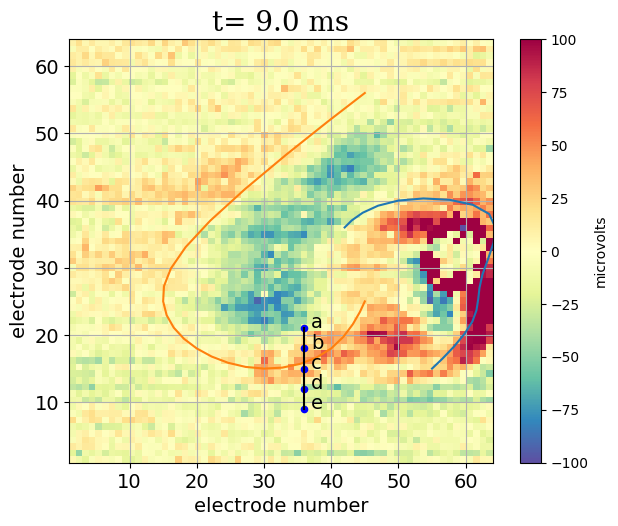

In [10]:
cuadro=98
exdesaturado=LFPProm[:,:,cuadro];
figure(figsize=(7.0,5.5))
font1 = Dict("family"=>"DejaVu Serif",
    "color"=>"black",
    "weight"=>"normal",
    "size"=>20)
milisec=round((cuadro-retraso)/freq; digits=1)

title("t= $milisec ms", fontdict=font1)
limites=100
PyPlot.xlim(1,64)
PyPlot.ylim(1,64)

for punto in 2:6
   annotate(puntol[punto], (puntox[punto], puntoy[punto]), xytext=(5,0), textcoords="offset points", fontsize=14)
   # annotate(primal[punto], (primax[punto], primay[punto]), xytext=(-18,-4), textcoords="offset points", fontsize=14)
   # annotate(dobleprimal[punto], (dobleprimax[punto], dobleprimay[punto]), xytext=(-18,-4), 
   # textcoords="offset points", fontsize=14)
end

imagen=imshow(exdesaturado, 
interpolation="nearest", cmap="Spectral_r", origin="lower", vmin=-limites, vmax=limites, extent=[1,64,1,64])
tick_params(axis="both", labelsize=14)

#scatter(muchasx,muchasy, marker="o", s=20, c="b")

scatter(puntox[2:end],puntoy[2:end], marker="o", s=20, c="b")

plot(gdx, gdy)
plot(cax, cay)

#scatter(primax,primay, marker="d", s=20, c="grey")
#scatter(dobleprimax,dobleprimay, marker="s", s=20, c="grey")

#Dice Rafael que quitemos el F

plot([puntox[2], puntox[end]], [puntoy[2], puntoy[end]], "k-")

cbx=colorbar(imagen, fraction=0.045) 
cbx.set_label("microvolts") #okey, no hay consenso de cuando es dot overloading y cuando es [:esto]
tick_params(axis="both", labelsize=14)

xlabel("electrode number", fontsize=14)
ylabel("electrode number", fontsize=14)
grid()

#savefig("LFP_Promedio_3R7-2-$cuadro.svg", dpi=90)

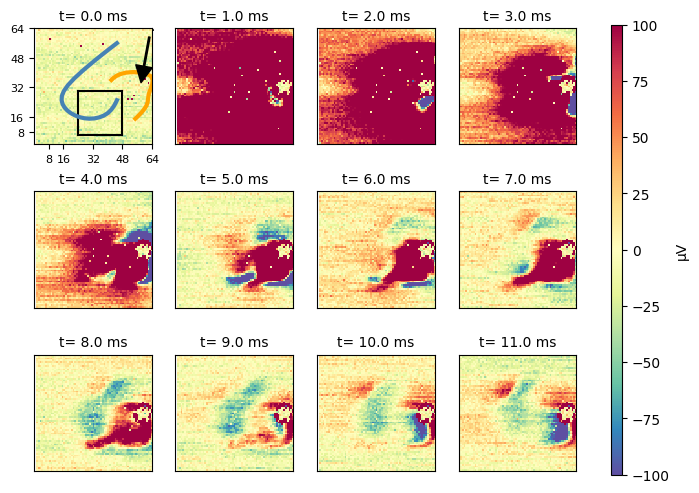

In [11]:
farofa, lista=subplots(3,4, figsize=(7,6)) #mas o menos tamano carta

aux=[]

milisec=round((cuadro-retraso)/freq, digits=1)


for j=1:3, k=1:4
    
    n=((j-1)*4+(k-1))*7+(retraso)
    lfp=LFPProm[:,:,n]
    milisec=round((n-retraso)/freq, digits=1)

    aux=lista[j,k].imshow(lfp, interpolation="nearest", cmap="Spectral_r", 
    origin="lower", vmin=-limites, vmax=limites, extent=[1,64,1,64])

     lista[j,k].set_title("t= $milisec ms", fontsize=10)
    
    lista[j,k].set_xlim(0,64)
    
    if k != 1 || j != 1
        lista[j,k].set_xticks([])
        lista[j,k].set_yticks([])
        
        
        
    else
        
          lista[j,k].plot([xizq, xder], [ybajo, ybajo], "k-")
        lista[j,k].plot([xizq, xder], [yalto, yalto], "k-")
        lista[j,k].plot([xizq, xizq], [ybajo, yalto], "k-")
        lista[j,k].plot([xder, xder], [ybajo, yalto], "k-")
        
       lista[j,k].tick_params(labelsize=8)
        lista[j,k].set_xticks([8,16,32,48,64])
        lista[j,k].set_yticks([8,16,32,48, 64])
        
        lista[j,k].annotate(".", (58,34), xytext=(63,63),
            arrowprops=Dict("facecolor"=>"black", 
                "shrink"=>0.02, "width"=>1))
        
        lista[j,k].plot(gdx, gdy, c="orange", lw=3) 
       lista[j,k].plot(cax, cay, c="steelblue", lw=3)
        
    end
    

end



cbaxes = farofa.add_axes([0.95, 0.12, 0.015, 0.75]) 

 cbxlfp=farofa.colorbar(aux, cax=cbaxes,
    #ax=lista[:,4], 
    shrink=1.0, aspect=80
    #  location="right",
    )
    
   # cbx=colorbar(imagen, fraction=0.045) 
  cbxlfp.set_label("µV") #okey, no hay consenso de c

nomsave=salvadir*"lfpevocado01.svg"
savefig(nomsave, dpi=150, bbox_inches="tight")

Dice Rafael que quitemos el Punto F y hagamos mas chiquito el Cuadro...

In [12]:
#=
ioff()
for t=retraso:(retraso+2) # nmax
 figura=figure(figsize=(7.0,5.5))
    imagen=imshow(SubDatLFP[:,:,t], origin="lower", interpolation="sinc", 
    vmin=-200,vmax=200, extent=(xizq,xder,ybajo,yalto),cmap="plasma")
 cbx=colorbar(imagen, fraction=0.045) 
    
    savefig("EvocadoPeli-$t.png",dpi=92)
    close(figura)
end
close()
=#

In [13]:
arxcsd="../JLDFiles/Evocada/CSDEvocada_3R7.jld"
CSD=load(arxcsd, "CSD")
CSDPlanchado=load(arxcsd, "CSDPlanchada")
CSDPromedio=CSD["Trancazo_1"]+CSD["Trancazo_2"]+CSD["Trancazo_3"]
CSDPlanchadoPromedio=CSDPlanchado["Trancazo_1"]+CSDPlanchado["Trancazo_2"]+CSDPlanchado["Trancazo_3"];
CSDPlanchadoPromedio/=3.0;

In [14]:
SubDatLFP=getindex(LFPProm, ybajo:yalto,xizq:xder,1:nmax);
SubDatCSD=getindex(CSDPlanchadoPromedio, ybajo:yalto,xizq:xder,1:nmax);

In [15]:
arxcm="../JLDFiles/Evocada/CSDEvocada_3R7-CM.jld"
cmpos=load(arxcm, "CMP")
cmneg=load(arxcm, "CMN");

In [16]:
#=tiempo=1:nmax
t=700


farofa, lista=subplots(15,15, sharex=true, sharey=true, figsize=(15,6*2.5))

for j=1:15,k=1:15
    xlim(-5,30)
    ylim(-400,400)
    yys=vec(SubDatos[j,k,tiempo])
    xxs=(tiempo.-retraso)/freq
    rojo=maximum(yys[70:nmax])/400
    if rojo>1
        rojo=0.99
    end
    lista[16-j,k].axis("off")
    lista[16-j,k].plot(xxs,yys, color=(rojo,0,0), lw=0.5)

end

lista[14,14].plot([25,30],[-330,-330], lw=1.5, c="k")
lista[14,14].annotate("5 ms", xy=(26,-300), fontsize=8)

lista[14,14].plot([25,25],[-330,-130], lw=1.5, c="k")
lista[14,14].annotate("200 µV", xy=(0,-230), fontsize=8)

savefig("MuchosTrazosSubMatrixView01.svg",dpi=92)
close()
=#

In [17]:
arxcat="../JLDFiles/Evocada/CSDEvocada_3R7-Tray-todas.jld"
CatenarioPositivo=load(arxcat, "CatenarioPositivo")
CatenarioNegativo=load(arxcat, "CatenarioNegativo");

In [18]:
8*freq+retraso

91.176

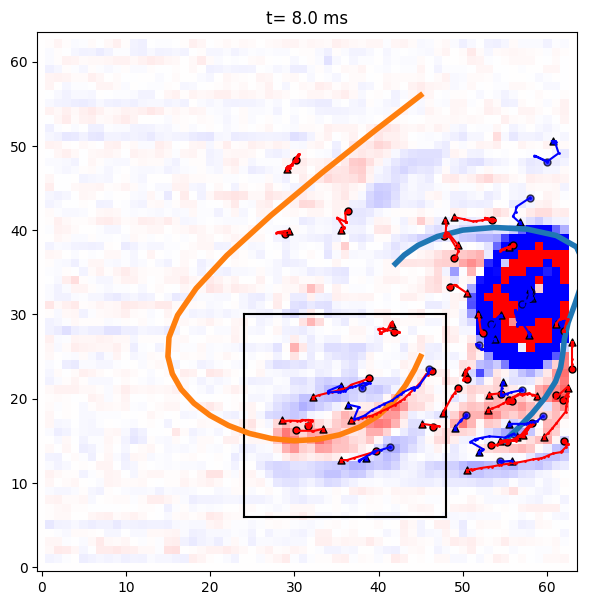

In [19]:
ion()
cuadro=91
excsd=CSDPlanchadoPromedio[:,:,cuadro];

figure(figsize=(6,6))
#axis("equal")
#tick_params(labelbottom="off", labelleft="off")
xlim(-0.50,63.5)
ylim(-0.5,63.5)
vlim=75
bolitasrojas=0
bolitasazules=0
minlargo=3
marcagor=25
muevemin=0.5
tight_layout()

n=cuadro-retraso
tau=round(n/freq, digits=1)

title("t= $tau ms")

guacafondo=imshow(excsd, cmap="bwr", 
    interpolation="nearest", origin="lower",
    #extent=[1,64,1,64],
    vmin=-vlim, vmax=vlim,)

    plot([xizq, xder], [ybajo, ybajo], "k-") 
       plot([xizq, xder], [yalto, yalto], "k-")
       plot([xizq, xizq], [ybajo, yalto], "k-")
 plot([xder, xder], [ybajo, yalto], "k-")


plot(gdx, gdy, lw=4)
plot(cax, cay, lw=4)

for p in values(CatenarioPositivo)
    gordura=abs.(p[:,3])
    desviax=std(p[:,1])
    desviay=std(p[:,2])
    longus,falsus=size(p)
    if mean(gordura)> marcagor && (desviax>muevemin || desviay>muevemin) && longus> minlargo 
        #Si son chiquitos no nos interesan.
        xxpos=p[:,1]
        yypos=p[:,2]    
        tiempos=p[:,4]./7022    
        plot(xxpos, yypos, marker="o", markersize=1, color="r")
        #bolitasrojas=scatter(xxpos,yypos, s=gordura, 
        #edgecolors="none", color="r" )
        inicios=scatter(xxpos[1],yypos[1], s=marcagor, edgecolors="black", 
        linewidth=1,
        facecolor="red", marker="o" )
        finales=scatter(xxpos[end],yypos[end], s=marcagor, edgecolors="black", 
        linewidth=1,facecolor="red", marker="^", label="Final" )
      #  annotate(round(tiempos[1]*1000,1),  (xxpos[1], yypos[1]), fontsize=7, color="black")
       # annotate(round(tiempos[end]*1000,1), (xxpos[end], yypos[end]), fontsize=7, color="green")

    end
end




for p in values(CatenarioNegativo)
    gordura=abs.(map(Float32,p[:,3]))
    desviax=std(map(Float32,p[:,1]))
    desviay=std(map(Float32, p[:,2]))
    longus,falsus=size(p)
    if mean(gordura)>marcagor && (desviax>muevemin || desviay > muevemin) &&longus> minlargo
        #Si son chiquitos no nos interesan.
        xxpos=p[:,1]
        yypos=p[:,2]    
        tiempos=p[:,4]./7022    
        plot(xxpos, yypos, marker="o", markersize=1, color="b")
        #bolitasazules=scatter(xxpos,yypos, s=gordura,
        #edgecolors="none", color="b")
        inicios=scatter(xxpos[1],yypos[1], s=marcagor, edgecolors="black", 
        linewidth=1,
        facecolor="blue", alpha=0.7, marker="o", label="Final" )
        finales=scatter(xxpos[end],yypos[end], s=marcagor, edgecolors="black", 
        linewidth=1,
        facecolor="blue", marker="^", label="Final" )
      #  annotate(round(tiempos[1],4),  (xxpos[1], yypos[1]), fontsize=7, color="black")
      #  annotate(round(tiempos[end],4), (xxpos[end], yypos[end]), fontsize=7, color="green")

    end
end

#colorbar(bolitasrojas, fraction=0.046)
#colorbar(bolitasazules, fraction=0.052, ticks=[])
nomout=salvadir*"TrEvo_3R7-todas.svg"
savefig(nomout, dpi=90)

In [20]:

font1 = Dict("family"=>"DejaVu Serif",
    "color"=>"black",
    "weight"=>"normal",
"size"=>16)
limcsd=60


for t=42:70:3 #tmax


 figure(figsize=(7.0,5.5))
 
    
 milisec=round((t-35)/7.022,digits=1)

 title("t= $milisec ms", fontdict=font1)
    imagen=imshow(SubDatos[:,:,t], origin="lower", 
        interpolation="nearest", 
        vmin=-limcsd,vmax=limcsd, extent=(xizq,xder,ybajo,yalto),cmap="coolwarm")
 cbx=colorbar(imagen, fraction=0.045, ticks=[]) 
 cbx[:set_label]("<-Sink | Source->")
   
 savefig("CSDEvocadoPeliNew-$t.png",dpi=92)
close()
end



In [21]:

font1 = Dict("family"=>"Arial",
    "color"=>"black",
    "weight"=>"normal",
"size"=>12)
limcsd=60

#for t in tiemposinteresantes
t=28
 figure(figsize=(3.0,3.0))    
    xlim(xizq,xder)
    ylim(ybajo,yalto)
    milisec=round((t-retraso)/freq,digits=1)

 title("t= $milisec ms", fontdict=font1)
    imagen=imshow(SubDatCSDSD[:,:,t], origin="lower", interpolation="sinc", 
    vmin=-limcsd,vmax=limcsd, extent=(xizq,xder,ybajo,yalto),cmap="coolwarm")
    
    tick_params(labelsize=8, direction="out")
        
    cbx=colorbar(imagen, fraction=0.045, ticks=[]) 
    cbx[:set_label]("<-Sink | Source->", fontsize=8)
    plot([xizq, xizq+12],[ybajo+1,ybajo+1],color="black")

    
xele=xizq:xder
yele=ybajo:yalto
    
for xi in xele, yi in yele
    scatter(xi,yi, s=1, color="black", marker="s")
end

   # tight_layout()
    savefig("CSDEvocado-$t.svg",dpi=92)


#end

UndefVarError: UndefVarError: SubDatCSDSD not defined

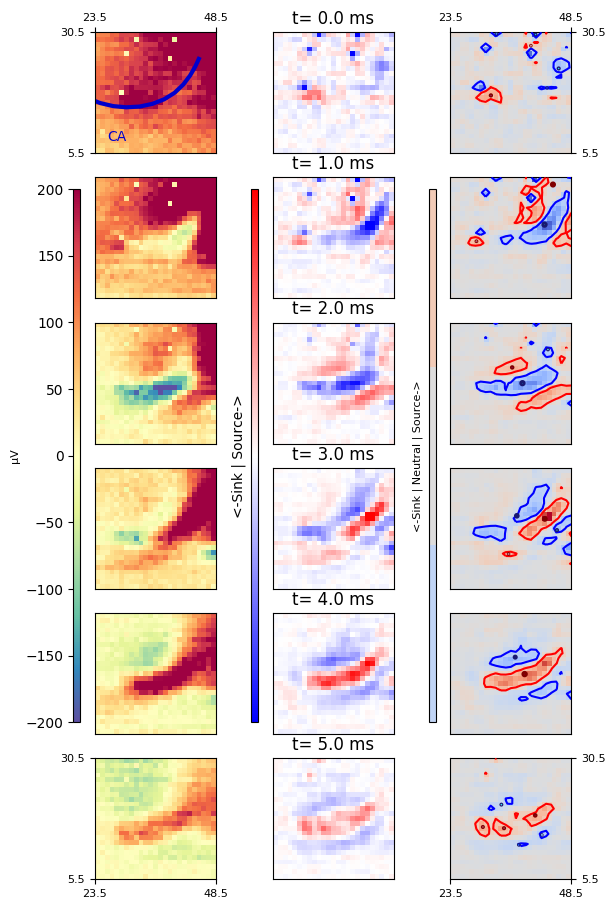

In [34]:
farofa, lista=subplots(6,3, figsize=(6.5,11), gridspec_kw=Dict("height_ratios"=>[1,1,1,1,1,1])) #mas o menos tamano carta

vlim=200
csdlim1=75
csdlim2=100
freq=7.022
imagenlfp=lista[:,1]
imagencsd=lista[:,2]
imagencou=lista[:,3]
epsi=20
vs=[-epsi,epsi]
(xi,xf,yi,yf)=(xizq-0.5,xder+0.5, ybajo-0.5,yalto+0.5)
exten=[xi,xf,yi,yf]

#cbax= farofa.add_axes([0.08,0.08, 0.09, 0.8])
lat=21 #latencia de interes

for j=1:6
    n=retraso+lat+(j-1)*7
  lfp=SubDatLFP[:,:,n]  
  csd=SubDatCSD[:,:,n]  
    tau=round((n-lat-retraso)/freq, digits=1)
    tit="t= $tau ms"

    
  for k=1:3  
  lista[j,k].set_xlim([xi,xf])
  lista[j,k].set_ylim([yi, yf])
  end
    
    
 imagenlfp=lista[j,1].imshow(lfp, origin="lower", vmin=-vlim, vmax=vlim,
        extent=exten,
        cmap="Spectral_r", interpolation="nearest")
 
    
      #uando es dot overloading y cuando es [:esto]
    
 imagencsd=lista[j,2].imshow(csd, origin="lower", vmin=-csdlim1, vmax=csdlim1,
       extent=exten,
        cmap="bwr",interpolation="nearest")
 lista[j,2].set_title(tit)

xxpos=cmpos[n][:,1]
yypos=cmpos[n][:,2]
gorpos=cmpos[n][:,3]./300

xxneg=cmneg[n][:,1]
yyneg=cmneg[n][:,2]
gorneg=abs.(cmneg[n])[:,3]./300

 imagencou=lista[j,3].imshow(csd, origin="lower", 
        vmin=-csdlim2, vmax=csdlim2, 
        cmap="coolwarm", 
        interpolation="nearest",
        extent=exten, 
        zorder=1)

  
    lista[j,3].scatter(xxpos, yypos, s=gorpos, c="purple", edgecolor="maroon", lw=2, zorder=5)
lista[j,3].scatter(xxneg, yyneg, s=gorneg, c="cyan", edgecolor="midnightblue", lw=2, zorder=5)

 lista[j,3].contour(csd, vs, lw=3, colors=("blue", "red"),
        extent=exten, 
        zorder=4)
   

#  
    for k=1:3
        lista[j,k].set_xticks([])
        lista[j,k].set_yticks([])

    end
    

end

#===== =00000000000000000000000000           =#

     lista[1,1].tick_params(labelsize=8, top=true, right=false, 
             left=true, bottom=false, labeltop=true, labelbottom=false)
         lista[1,3].tick_params(labelsize=8, top=true, right=true,
    labelleft=false,
             left=false, bottom=false, labeltop=true, labelright=true,
    labelbottom=false)
    lista[6,1].tick_params(labelsize=8, top=false, right=false, 
             left=true, bottom=true, labeltop=false, labelbottom=true)
         lista[6,3].tick_params(labelsize=8, top=false, right=true,
    labelleft=false,
             left=false, bottom=true, labeltop=false, labelright=true,
    labelbottom=true)


    
for j in (1,6), k in (1,3)
        #lista[j,k].set_xticks([1,16,32,48,64])
        #lista[j,k].set_yticks([1,16,32,48,64])
        lista[j,k].set_xticks([xi,xf])
        lista[j,k].set_yticks([yi,yf])

end


  lista[1,1].annotate("CA", xy=(26,8), color="mediumblue")
    lista[1,1].annotate("GD", xy=(50,8), color="orange")

       # lista[1,1].plot(gdx, gdy, c="orange", lw=3) 
       lista[1,1].plot(cax, cay, c="mediumblue", lw=3)
           lista[1,1].plot(gdx, gdy, c="orange", lw=3)


 cbxlfp=farofa.colorbar(imagenlfp, ax=lista[:,1], shrink=1.0, 
      location="left", aspect=80, fraction=0.045)
#cbxlfp.ax.tick_params(labelsize=8)
    
  cbxlfp.set_label(label="µV", size=8) #okey, no hay consenso de c

 cbxcsd=farofa.colorbar(imagencsd, ax=lista[:,2], shrink=1.0,
      location="left", aspect=80, fraction=0.045, ticks=[])
   cbxcsd.set_label(label="<-Sink | Source->")


 cbxcou=farofa.colorbar(imagencou, ax=lista[:,3], shrink=1.0,
      location="left", aspect=80, fraction=0.045, ticks=[], 
    values=[-epsi, 0,epsi] , boundaries=[-csdlim2,-1, 1,csdlim2])
   cbxcou.set_label(label="<-Sink | Neutral | Source->", size=8)


nomsave=salvadir*"TablaLFPCSDCMSubCA3-Evocadca_3R7."
nomsave1=nomsave*"pdf"
nomsave2=nomsave*"svg"
nomsave3=nomsave*"png"

#tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)


for nomine in (nomsave1, nomsave2, nomsave3) 
    savefig(nomine,dpi=100)
end


In [23]:
for j in (1,6), k in (1,3)
   #     lista[j,k].set_xticks([1,8,16,32,48,64])
    #    lista[j,k].set_yticks([1,8,16,32,48,64])
    println(j, k)
end

11
13
61
63


1 1 96 M 1 2 96 M 1 3 96 M 2 1 96 M 2 2 96 M 2 3 96 M 3 1 96 M 3 2 96 M 3 3 96 M 4 1 96 M 4 2 96 M 4 3 96 M 5 1 96 M 5 2 96 M 5 3 96 M 

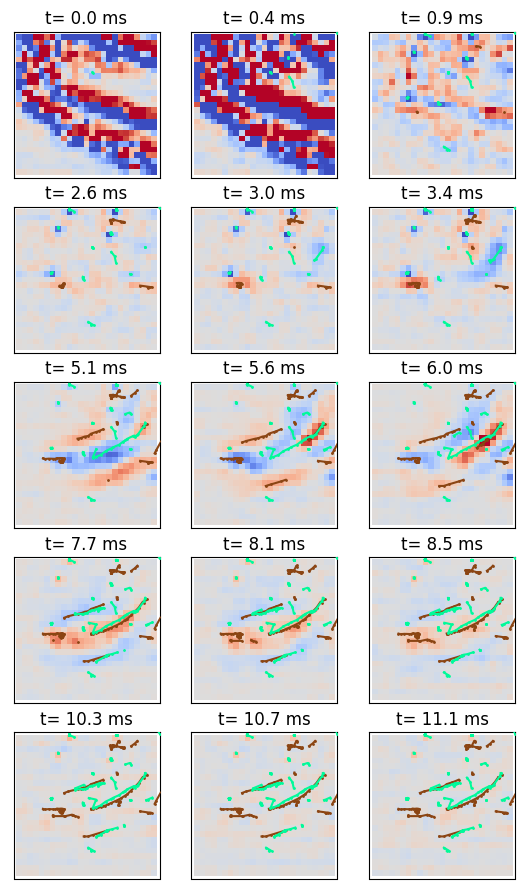

1436.352142 seconds (855.04 k allocations: 38.286 MiB, 0.00% gc time)


In [43]:
farofa, lista=subplots(5,3, figsize=(6.5,11)) #mas o menos tamano carta

csdlim1=75
freq=7.022
imagenlfp=lista[:,1]
imagencsd=lista[:,2]
epsi=25
vs=[-epsi,epsi]
(xi,xf,yi,yf)=(0.5,0.5, 64.5,64.5)
exten=[xi,xf,yi,yf]
#cbax= farofa.add_axes([0.08,0.08, 0.09, 0.8])
lat=21 #latencia de interes
paso=3

@time for j=1:5, k=1:3
    n=retraso+(j-1)*paso*6+(k-1)*paso
    csd=SubDatCSD[:,:,n]  
    tau=round((n-retraso)/freq, digits=1)
    tit="t= $tau ms"
   
    
    lista[j,k].set_xlim([xizq-0.5,xder+0.5])
    lista[j,k].set_ylim([ybajo-0.5, yalto+0.5])
    
    
    lista[j,k].set_title(tit)

    lista[j,k].set_xticks([])
    lista[j,k].set_yticks([])
    
    
    lista[j,k].imshow(csd, origin="lower", 
        vmin=-csdlim1, vmax=csdlim1, cmap="coolwarm", 
        interpolation="nearest",
        extent=[xizq,xder,ybajo,yalto], 
        zorder=1)
    
    
     kuku=0
    
    for p in values(CatenarioPositivo)
    kuku+=1
         
        paux=AntesQue(p,n+paso)
        paux=DespuesQue(paux,retraso)
        cucho,fleto=size(paux)
    
        if  (p[end,4] >= retraso) && cucho>0
            xxpos=paux[:,1]
            yypos=paux[:,2]    
            gordis=abs.(map(Float32, paux[:,3]))
         lista[j,k].plot(xxpos, yypos, marker="o", markersize=1, 
                color="saddlebrown", lw=1.5,zorder=4)
        end
   end
    
            
    print(j, " ", k, " ", kuku, " M ")
    
    kuku=0  
    
    
    for p in values(CatenarioNegativo)
    kuku+=1
         
        paux=AntesQue(p,n+paso)
        paux=DespuesQue(paux,retraso)
        cucho,fleto=size(paux)
    
        if  (p[end,4] >= retraso) && cucho>0
            xxpos=paux[:,1]
            yypos=paux[:,2]    
            gordis=abs.(map(Float32, paux[:,3]))
         lista[j,k].plot(xxpos, yypos, marker="o", markersize=1, 
                color="mediumspringgreen", lw=1.5,zorder=4)
        end
   end
    
    
end


nomsave=salvadir*"TablaTrayectoriasSub-Evocadca_3R7."
nomsave1=nomsave*"pdf"
nomsave2=nomsave*"svg"
nomsave3=nomsave*"png"

#tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)


for nomine in (nomsave1, nomsave2, nomsave3) 
    savefig(nomine,dpi=100)
end


In [25]:
a=randn(3,3)

3×3 Array{Float64,2}:
 0.528902    0.192802  -0.425309
 1.68        0.184808   1.09616 
 0.0652378  -1.26424    0.137721

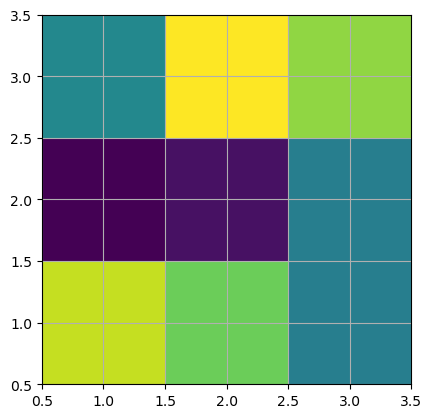

In [37]:
fig=figure(size(3,3))
imshow(a, origin="lower", extent=[0.5,3.5,0.5,3.5])
grid()